# Calibration using Zhang's procedure

In [68]:
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2 # OpenCV
from calibration import Calibrator

## 1. Calibrate using Zhang procedure, i.e., find the intrinsic parameters K and, for each image, the pair of R, t (extrinsic);

In [69]:
calibrator = Calibrator((6,9), 24/1000)

folderpath = './phone_images'
images_path = [os.path.join(folderpath, imagename) for imagename in os.listdir(folderpath) if imagename.endswith(".jpeg")]
images_path.sort()
limages = []

for path in images_path:
    image = cv2.imread(path)
    limages.append(image)

calibrator.fit(limages, radial_distortion=False, iterative=False)
print("K:",calibrator.K)
print("Rotation matrices:")
for i,R in enumerate(calibrator.rotations):
   print(f"R{i+1}:{R}")
print("Translation vectors:")
for i,t in enumerate(calibrator.translations):
    print(f"t{i+1}:{t}")

K: [[1.23271372e+03 2.02740532e+00 8.10365514e+02]
 [0.00000000e+00 1.22660315e+03 5.99428548e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Rotation matrices:
R1:[[ 0.99640307 -0.08445141  0.00699151]
 [-0.08095592 -0.97304018 -0.21596052]
 [ 0.02504119  0.21461772 -0.97637707]]
R2:[[ 0.83731631 -0.44141146  0.32257916]
 [-0.38998095 -0.89574274 -0.21344744]
 [ 0.38316609  0.0529233  -0.92216206]]
R3:[[ 0.97058611 -0.2238542   0.08861099]
 [-0.17365156 -0.90585463 -0.38635801]
 [ 0.16675654  0.35960628 -0.91808255]]
R4:[[ 0.95524495  0.29561904  0.01079252]
 [ 0.29442534 -0.94658785 -0.13147306]
 [-0.02864987  0.12876657 -0.99126099]]
R5:[[ 0.89792885 -0.42084557  0.12889061]
 [-0.31478606 -0.81871395 -0.4802262 ]
 [ 0.30762561  0.39063599 -0.86762319]]
R6:[[-0.99768585 -0.06662636  0.01355959]
 [-0.05611872  0.91951478  0.3890286 ]
 [-0.03838781  0.38736738 -0.92112588]]
R7:[[-0.78429002  0.31242758  0.53598337]
 [ 0.22739395  0.94858141 -0.22019376]
 [-0.57721847 -0.0508164  

## 2. Choose one of the calibration images and compute the total reprojection error for all the grid points (adding a figure with the reprojected points);

### Basic procedure

In [70]:
index=1

calibrator.fit(limages, radial_distortion=False, iterative=False)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in calibrator.pix_coords[index]:
    copy2 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )

copy2= copy1.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy2,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )

noi_nor=calibrator.reprojection_errors

plt.figure(figsize=(20,20))
plt.imshow(copy2)
plt.title(f"Total reprojection error: {error}")

[np.float64(2.096996171114015), np.float64(6.340410025712072), np.float64(8.43187445392612), np.float64(1.569523410348368), np.float64(28.43353551471152), np.float64(5.605878270541149), np.float64(37.6064714775465), np.float64(39.324036030579364), np.float64(4.487862321561447), np.float64(6.436879901697479), np.float64(59.46937041973819), np.float64(3.6144516778621076), np.float64(2.603532794752905), np.float64(19.29272158056883), np.float64(6.387583913111151), np.float64(1.8369834670952288), np.float64(30.279641620593), np.float64(23.854308506363992), np.float64(82.81990747283542), np.float64(44.80840253832597), np.float64(42.008309458824854), np.float64(3.686697835052111), np.float64(27.060079799242157), np.float64(1.7506348932323652), np.float64(11.680076325660876)]


Text(0.5, 1.0, 'Total reprojection error: 6.340410025712072')

### Iterative refinement

[np.float64(1.0152941418748254), np.float64(2.4804323762904663), np.float64(3.6421472502228265), np.float64(0.6809434397850542), np.float64(4.896970762340698), np.float64(3.181814614298619), np.float64(4.695786292108237), np.float64(4.169860508929762), np.float64(3.054402731876358), np.float64(3.2717636371251433), np.float64(5.724114519909345), np.float64(2.696805046971494), np.float64(1.8767282201611997), np.float64(4.75698130799107), np.float64(3.2891047624571446), np.float64(1.4954287518084401), np.float64(9.64445624458913), np.float64(4.632533756381402), np.float64(5.645654447810473), np.float64(2.3721504955232935), np.float64(4.9679695992138), np.float64(3.142128616834513), np.float64(3.240876736169692), np.float64(1.4985993285349277), np.float64(3.960074821367625)]


Text(0.5, 1.0, 'Total reprojection error: 2.4804323762904663')

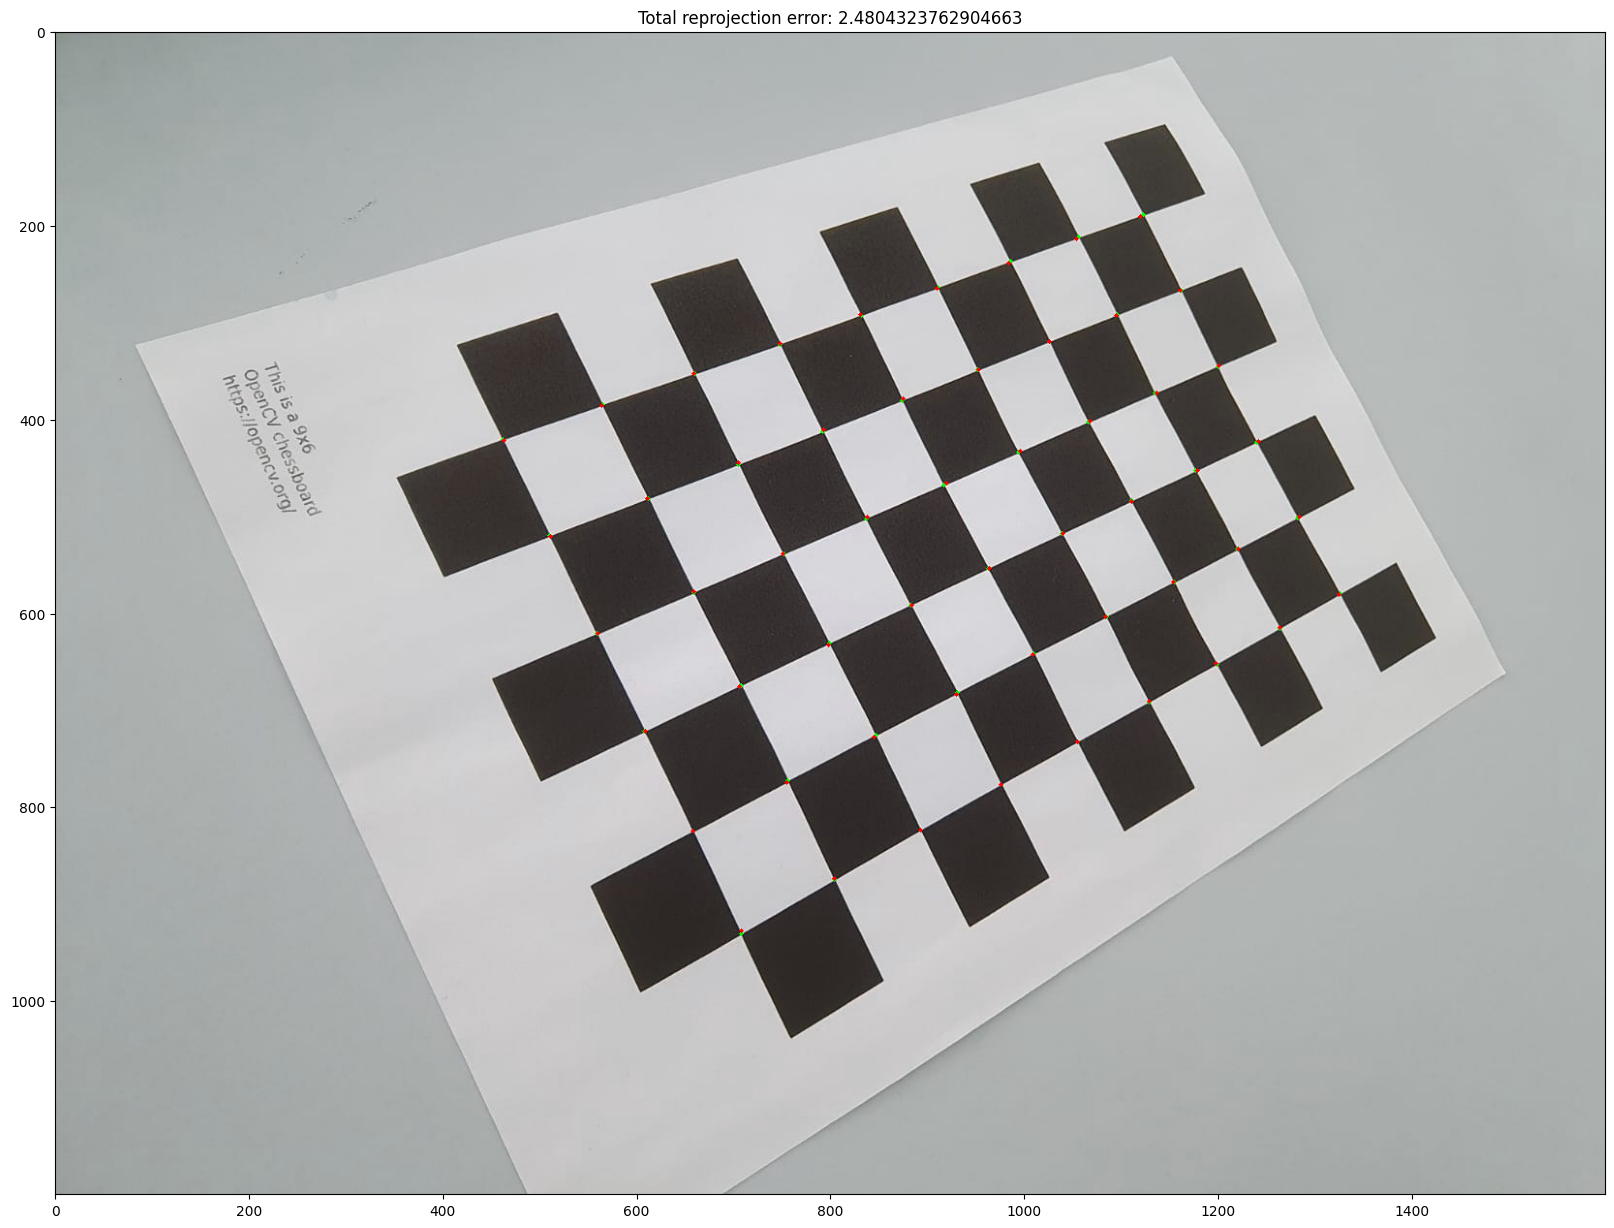

In [71]:
calibrator.fit(limages, radial_distortion=False, iterative=True)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in calibrator.pix_coords[index]:
    copy2 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
    
copy2= copy1.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy2,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )

i_nor=calibrator.reprojection_errors
plt.figure(figsize=(20,20))
plt.imshow(copy2)
plt.title(f"Total reprojection error: {error}")

### Iterative refinement and distortion compensation

[np.float64(1.2622996592199467), np.float64(1.8650990901811855), np.float64(2.7851087484838044), np.float64(0.7404899528753062), np.float64(3.4545902579201906), np.float64(1.9354023756401597), np.float64(3.294587951606288), np.float64(3.514666045907425), np.float64(1.7473239050853548), np.float64(1.936893165869636), np.float64(5.4994122952786535), np.float64(1.5683258281126198), np.float64(0.5850532019340826), np.float64(3.7463558463230706), np.float64(2.3784815095197525), np.float64(2.280649966024172), np.float64(8.886838540720014), np.float64(3.7273588622072116), np.float64(4.043856865884083), np.float64(1.7566892859886172), np.float64(4.274972712434571), np.float64(2.435679831355176), np.float64(2.1176901440417373), np.float64(0.693662134918771), np.float64(2.835829421893509)]


Text(0.5, 1.0, 'Total reprojection error: 1.8650990901811855')

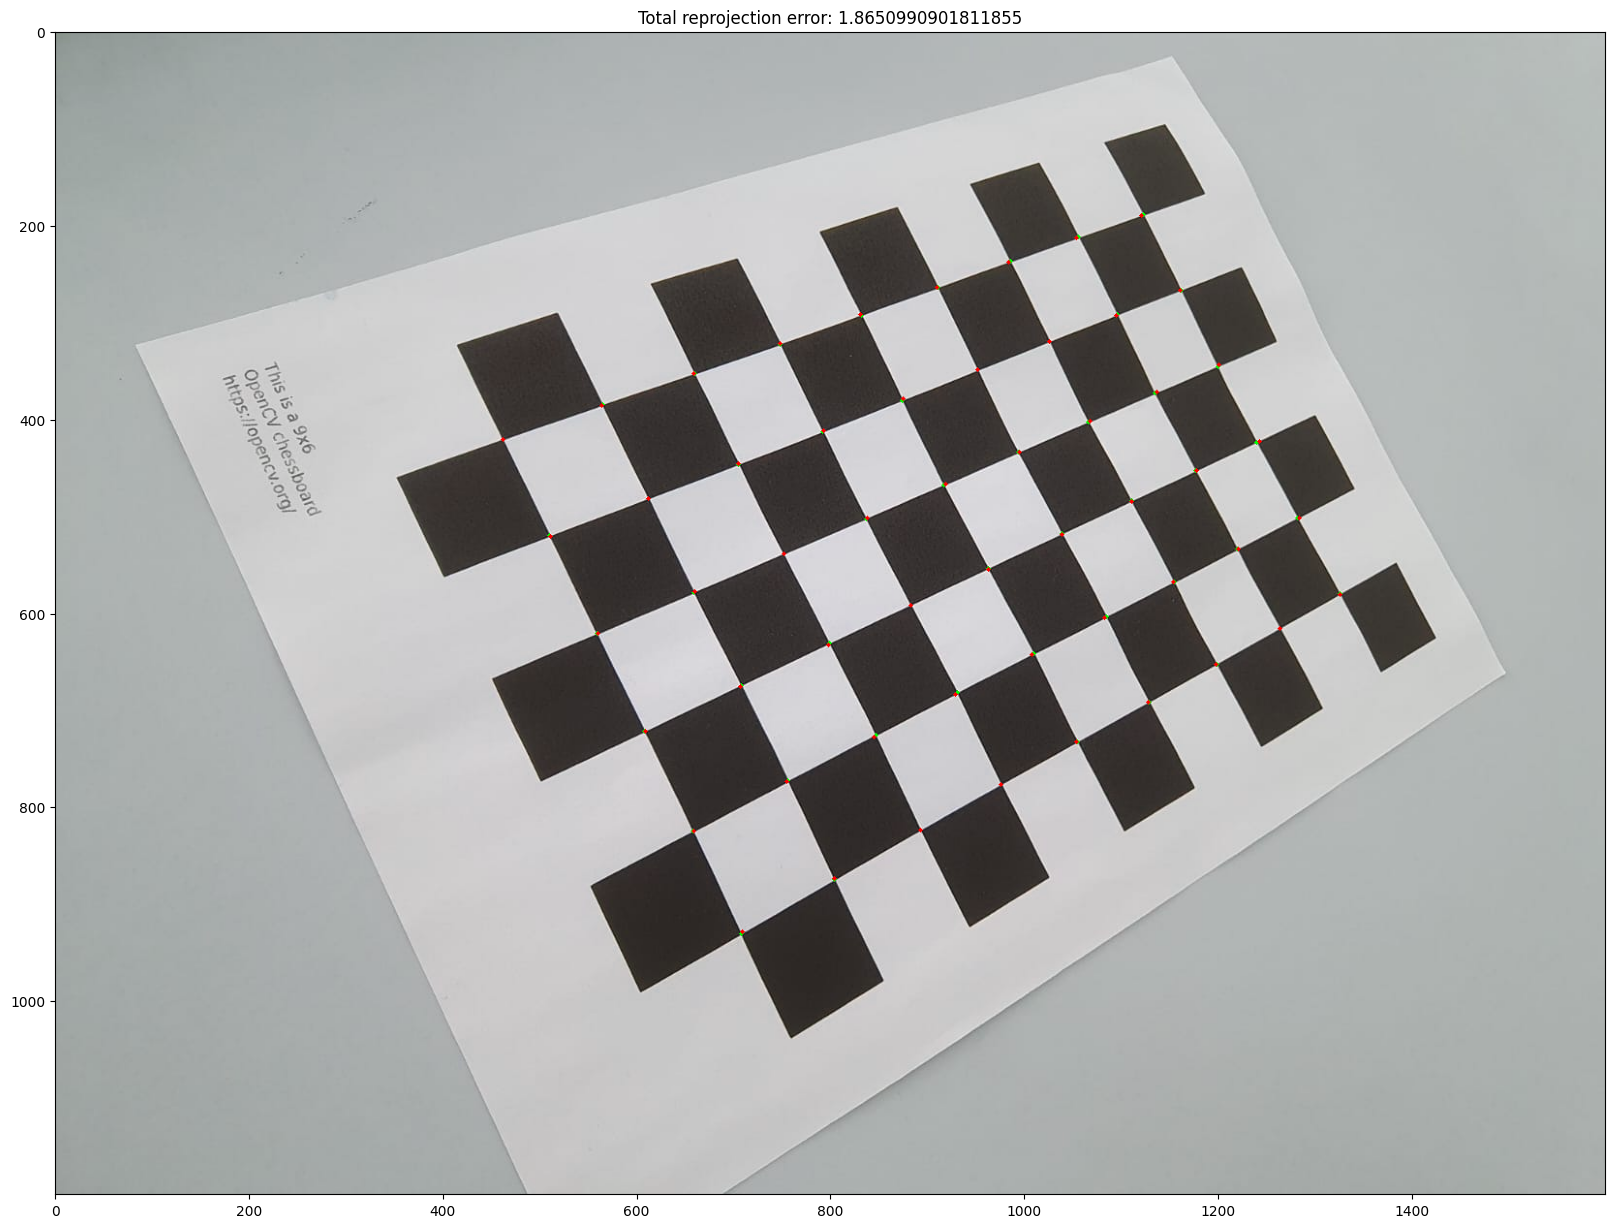

In [72]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in calibrator.pix_coords[index]:
    copy2 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
copy2= copy1.copy()
for point in proj_chess:
    distorted = calibrator.distort_coordinates(point[0], point[1])
    distorted = np.array(list(distorted))
    copy1 = cv2.drawMarker(img=copy2,
                           position=tuple(np.array(distorted, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )

plt.figure(figsize=(20,20))
plt.imshow(copy2)
plt.title(f"Total reprojection error: {error}")

### All in one

[np.float64(2.096996171114015), np.float64(6.340410025712072), np.float64(8.43187445392612), np.float64(1.569523410348368), np.float64(28.43353551471152), np.float64(5.605878270541149), np.float64(37.6064714775465), np.float64(39.324036030579364), np.float64(4.487862321561447), np.float64(6.436879901697479), np.float64(59.46937041973819), np.float64(3.6144516778621076), np.float64(2.603532794752905), np.float64(19.29272158056883), np.float64(6.387583913111151), np.float64(1.8369834670952288), np.float64(30.279641620593), np.float64(23.854308506363992), np.float64(82.81990747283542), np.float64(44.80840253832597), np.float64(42.008309458824854), np.float64(3.686697835052111), np.float64(27.060079799242157), np.float64(1.7506348932323652), np.float64(11.680076325660876)]
[np.float64(1.0152941418748254), np.float64(2.4804323762904663), np.float64(3.6421472502228265), np.float64(0.6809434397850542), np.float64(4.896970762340698), np.float64(3.181814614298619), np.float64(4.695786292108237)

Text(0.5, 1.0, 'Total reprojection error: 1.8650990901811855')

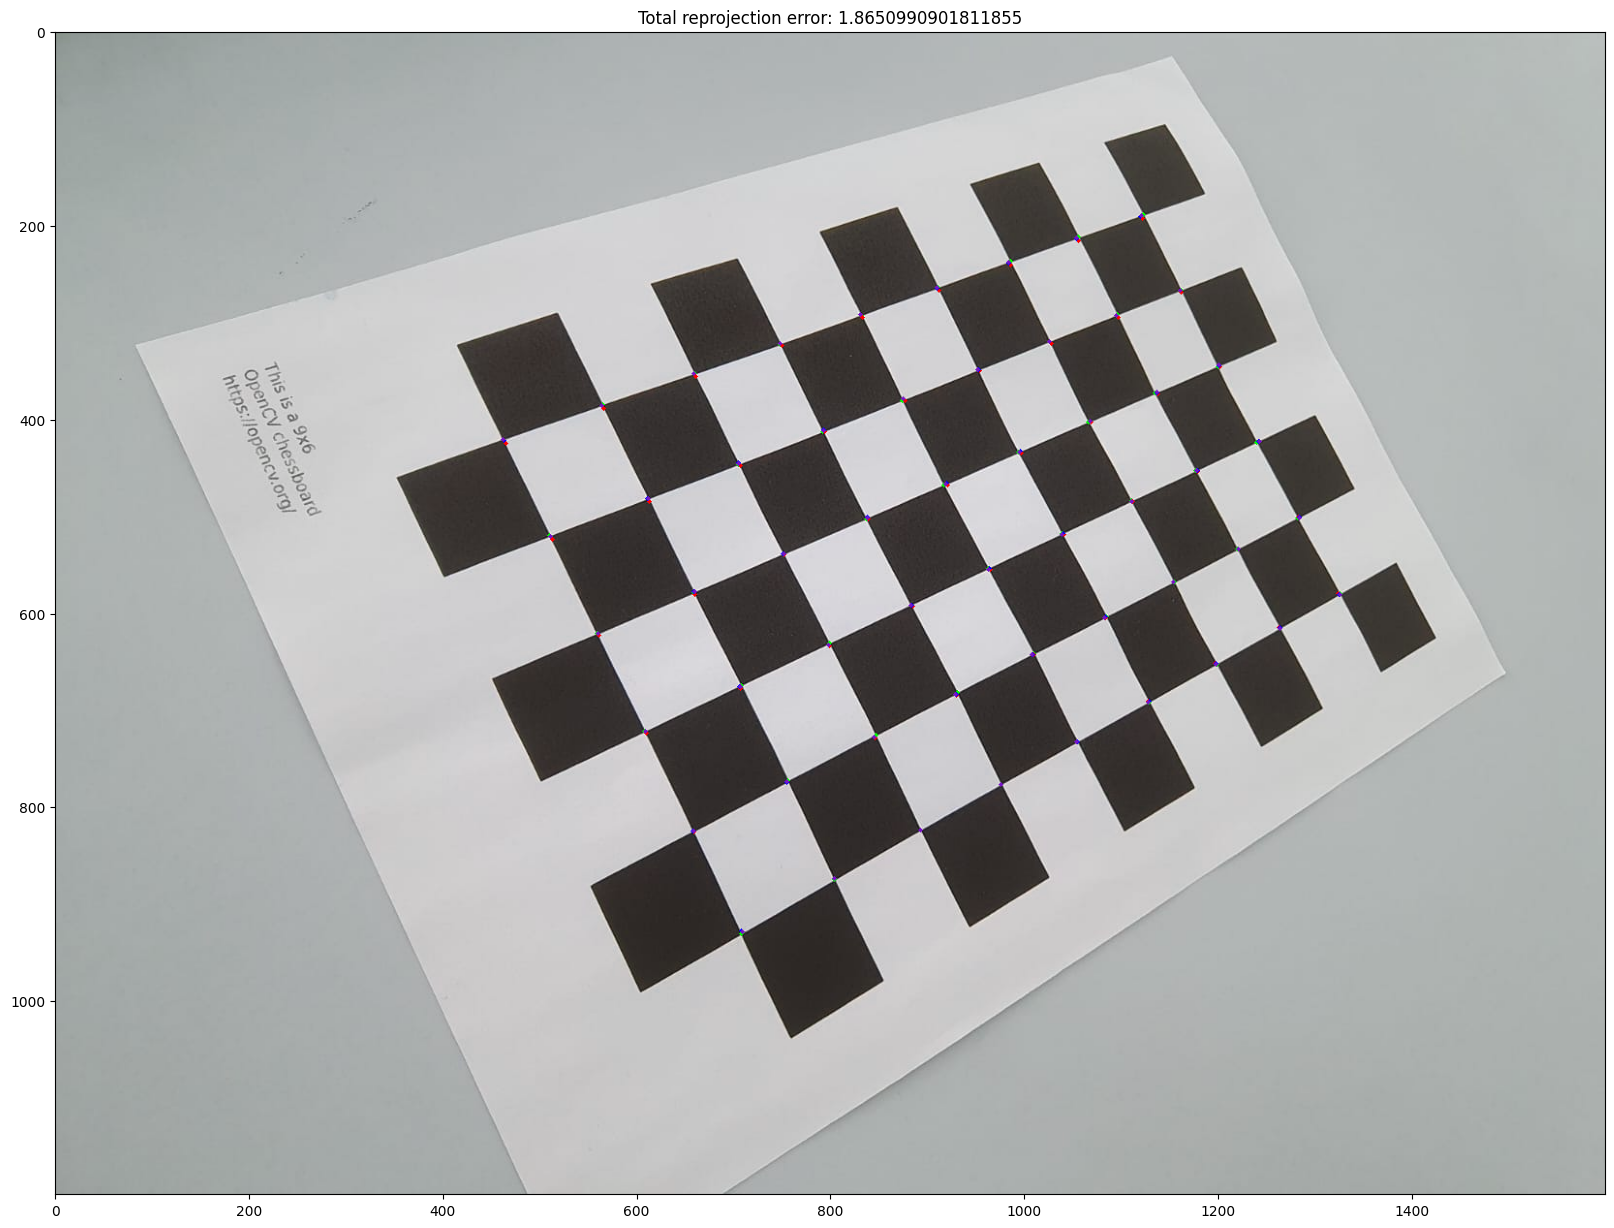

In [73]:
image_chosen = cv2.imread(images_path[index])
copy1 = image_chosen.copy()

# True coordinates
for point in calibrator.pix_coords[index]:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_CROSS,
                           thickness=3,
                           markerSize=1
                           )
    
# Algebraic minimization, no radial distortion
calibrator.fit(limages, radial_distortion=False, iterative=False)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
for point in proj_chess:
    distorted = calibrator.distort_coordinates(point[0], point[1])
    distorted = np.array(list(distorted))
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(distorted, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
# Geometric minimization, no radial distortion
calibrator.fit(limages, radial_distortion=False, iterative=True)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
for point in proj_chess:
    distorted = calibrator.distort_coordinates(point[0], point[1])
    distorted = np.array(list(distorted))
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(distorted, dtype=np.int32)),
                           color=(0,0,255),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
# Geometric minimization, radial distortion
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
for point in proj_chess:
    distorted = calibrator.distort_coordinates(point[0], point[1])
    distorted = np.array(list(distorted))
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(distorted, dtype=np.int32)),
                           color=(120,20,200),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )

plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")

## 3. Superimpose an object (for instance, a cylinder), to the calibration plane, in all the images employed for the calibration;

In [74]:
# Funzione generata con Microsoft Copilot
def create_image_grid(image_list, grid_size, is_bw=False):
    rows, cols = grid_size
    if len(image_list) != rows * cols:
        raise ValueError("Il numero di immagini non corrisponde alla dimensione della griglia")

    img_height, img_width = image_list[0].shape[:2]

    if not is_bw:
        grid_image = np.zeros((rows * img_height, cols * img_width, 3), dtype=np.uint8)
    else:
        grid_image = np.zeros((rows * img_height, cols * img_width), dtype=np.uint8)

    for idx, img in enumerate(image_list):
        row = idx // cols
        col = idx % cols
        grid_image[row * img_height:(row + 1) * img_height, col * img_width:(col + 1) * img_width] = img

    return grid_image

In [75]:
pts = cv2.ellipse2Poly((24,24), (48,48), 0, 0, 360, 1)
pts = pts/1000
et_low = np.empty_like(pts)
et_high = np.empty_like(et_low)
pts_low = np.hstack((pts, np.zeros((pts.shape[0],1)), np.ones((pts.shape[0],1))))
pts_high = np.hstack((pts, np.full((pts.shape[0],1), 0.120), np.ones((pts.shape[0],1))))

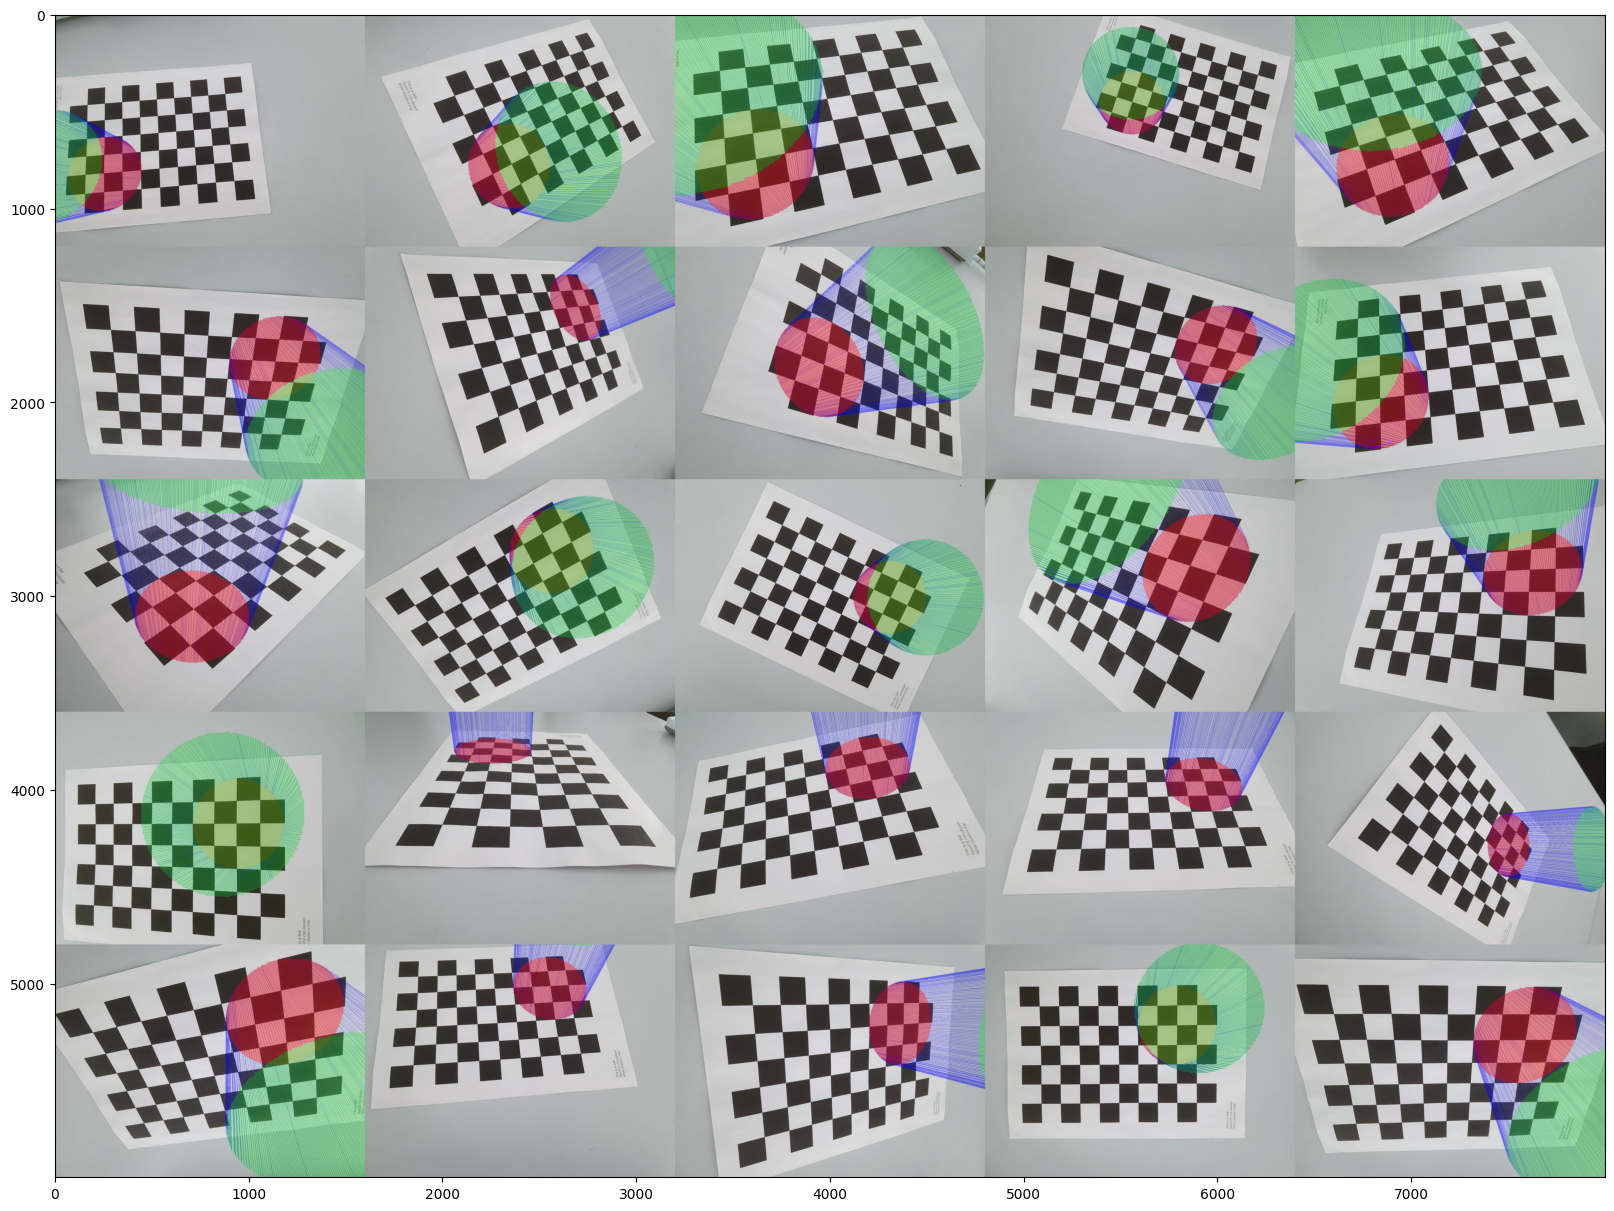

In [76]:
image_list = []
for i,path in enumerate(images_path):
    original = cv2.imread(path)
    P = calibrator.projection_matrices[i]

    proj_low = np.transpose(P @ pts_low.T)
    et_low[:,0] = proj_low[:,0]/proj_low[:,2]
    et_low[:,1] = proj_low[:,1]/proj_low[:,2]

    proj_high = np.transpose(P @ pts_high.T)
    et_high[:,0] = proj_high[:,0]/proj_high[:,2]
    et_high[:,1] = proj_high[:,1]/proj_high[:,2]

    img2 = original.copy()
    img2 = cv2.fillConvexPoly(img2,np.array(et_low, dtype=np.int32),(255,0,0))
    img3 = cv2.fillConvexPoly(img2.copy(),np.array(et_high, dtype=np.int32),(0,255,0))
    img4 = original.copy()
    for i in range(et_low.shape[0]):
        img4 = cv2.line(img4, tuple(np.array(et_low[i], dtype=np.int32)), tuple(np.array(et_high[i], dtype=np.int32)),(0,0,255))
    img2 = cv2.addWeighted(img2, 0.5, original, 0.5, 0)
    img3 = cv2.addWeighted(img2, 0.5, img3, 0.5, 0)
    img4 = cv2.addWeighted(img3, 0.5, img4, 0.5, 0)
    image_list.append(img4)

compound = create_image_grid(image_list, (5,5))
plt.figure(figsize=(20,20))
plt.imshow(compound)

### Compensated image

The distortion in the periphery of the image probably depends on the usage of images where the chessboard is almost always in the center.

[np.float64(1.2622996592199467), np.float64(1.8650990901811855), np.float64(2.7851087484838044), np.float64(0.7404899528753062), np.float64(3.4545902579201906), np.float64(1.9354023756401597), np.float64(3.294587951606288), np.float64(3.514666045907425), np.float64(1.7473239050853548), np.float64(1.936893165869636), np.float64(5.4994122952786535), np.float64(1.5683258281126198), np.float64(0.5850532019340826), np.float64(3.7463558463230706), np.float64(2.3784815095197525), np.float64(2.280649966024172), np.float64(8.886838540720014), np.float64(3.7273588622072116), np.float64(4.043856865884083), np.float64(1.7566892859886172), np.float64(4.274972712434571), np.float64(2.435679831355176), np.float64(2.1176901440417373), np.float64(0.693662134918771), np.float64(2.835829421893509)]
[[239 239 240 ...   3   3   4]
 [241 240 240 ...   3   3   4]
 [242 241 241 ...   3   3   4]
 ...
 [253 253 253 ...   3   2   2]
 [253 253 253 ...   4   3   2]
 [254 253 253 ...   3   3   3]] 0 255


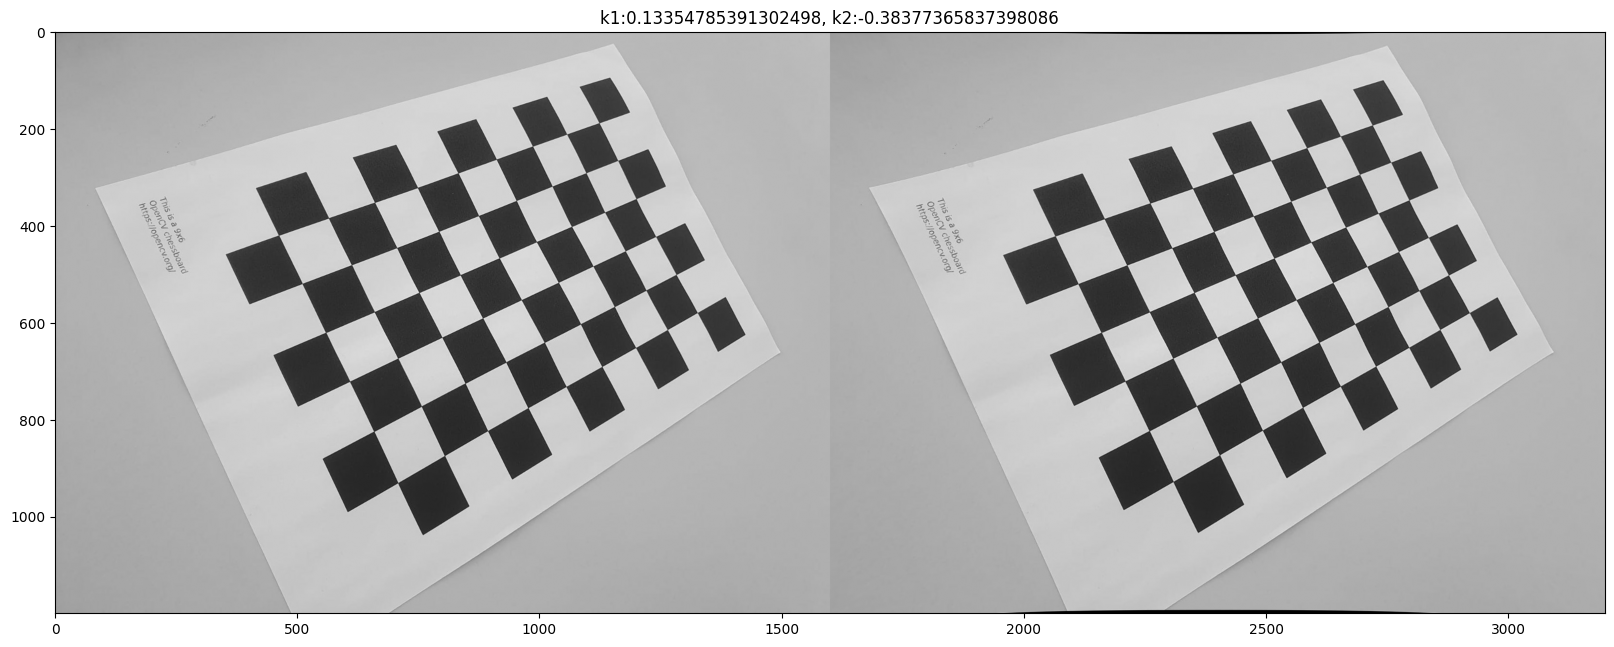

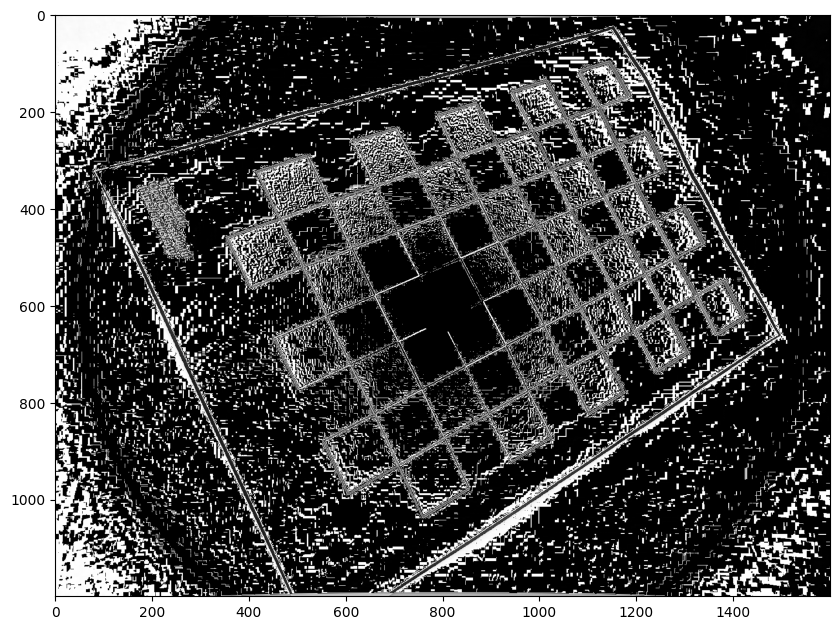

In [77]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
image7 = cv2.imread(images_path[index])
image7 = cv2.cvtColor(image7.copy(), cv2.COLOR_BGR2GRAY)
undistorted7 = calibrator.compensate_radial_distortion(image7)
limage1 = [image7, undistorted7]
compound = create_image_grid(limage1, (1,2), True)
diff = image7 - undistorted7
ir = calibrator.reprojection_errors
print(diff, np.min(diff), np.max(diff))
plt.figure(figsize=(20,20))
plt.imshow(compound, cmap='gray')
plt.title(f"k1:{calibrator.distortion_parameters[0]}, k2:{calibrator.distortion_parameters[1]}")

plt.figure(figsize=(10,10))
plt.imshow(diff, cmap='gray')

[np.float64(1.2622996592199467), np.float64(1.8650990901811855), np.float64(2.7851087484838044), np.float64(0.7404899528753062), np.float64(3.4545902579201906), np.float64(1.9354023756401597), np.float64(3.294587951606288), np.float64(3.514666045907425), np.float64(1.7473239050853548), np.float64(1.936893165869636), np.float64(5.4994122952786535), np.float64(1.5683258281126198), np.float64(0.5850532019340826), np.float64(3.7463558463230706), np.float64(2.3784815095197525), np.float64(2.280649966024172), np.float64(8.886838540720014), np.float64(3.7273588622072116), np.float64(4.043856865884083), np.float64(1.7566892859886172), np.float64(4.274972712434571), np.float64(2.435679831355176), np.float64(2.1176901440417373), np.float64(0.693662134918771), np.float64(2.835829421893509)]
[np.float64(2.096996171114015), np.float64(6.340410025712072), np.float64(8.43187445392612), np.float64(1.569523410348368), np.float64(28.43353551471152), np.float64(5.605878270541149), np.float64(37.606471477

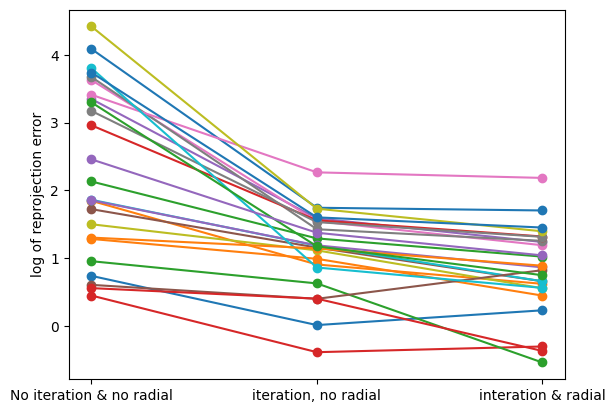

In [78]:
print(ir)
print(noi_nor)
print(i_nor)

for i in range(len(ir)):
    plt.plot([0, 1, 2], [np.log(noi_nor[i]), np.log(i_nor[i]), np.log(ir[i])], 'o-')
    plt.xticks(ticks=[0, 1, 2], labels=['No iteration & no radial', 'iteration, no radial', 'interation & radial'])
    plt.ylabel('log of reprojection error')